在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以 Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。



Q1：透過數值法計算 Age 和 Survived 是否有相關性？

Q2：透過數值法計算 Sex 和 Survived 是否有相關性？

Q3：透過數值法計算 Age 和 Fare 是否有相關性？

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from IPython.display import display

In [4]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Age和Fare為連續資料,具有分佈範圍
然而Survived和Sex兩者非連續資料
故先以Pearson相關查看Age和Fare之間是否有連續資料相關

0.0915660932850576


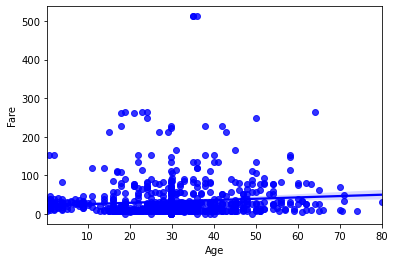

In [10]:
corr, _ = stats.pearsonr(data['Age'], data['Fare'])
print(corr)

g = sns.regplot(x = "Age", y = "Fare", color = 'b', data = data)

呈現低線性相關,年齡與票價無線性相關

In [11]:
# Age和Survived為連續對離散,運用ETA Squared運算
import pingouin as pg

In [12]:
aov = pg.anova(dv = 'Age', between = 'Survived', data = data, detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived,733.209612,1,733.209612,4.353516,0.037217,0.004873
1,Within,149723.426332,889,168.417802,NaN,NaN,NaN


In [13]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.004873228806595025

In [14]:
def valite_etaSq(etaSq):
    if etaSq < .01:
        print("Negligible")
    elif etaSq < .06:
        print("Small")
    elif etaSq < .14:
        print("Medium")
    else:
        print("Large")
        
valite_etaSq(etaSq)

Negligible


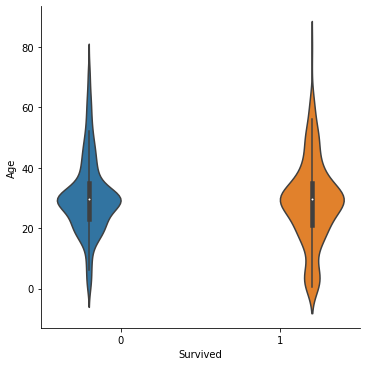

In [16]:
g = sns.catplot(x = 'Survived', y = 'Age', hue = 'Survived', data = data, kind = 'violin')

In [17]:
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return qual

In [18]:
import researchpy

In [19]:
contTable = pd.crosstab(data['Sex'], data['Survived'])
contTable

Survived,0,1
Sex,,
female,81,233
male,468,109


In [22]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
df 

1

In [24]:
corsstable, res = researchpy.crosstab(data['Sex'], data['Survived'], test = 'chi-square')
print("Crame's value = ", res.loc[2, 'results'])

Crame's value =  0.5434


In [26]:
judgment_CramerV(df, res.loc[2, 'results'])

'large'

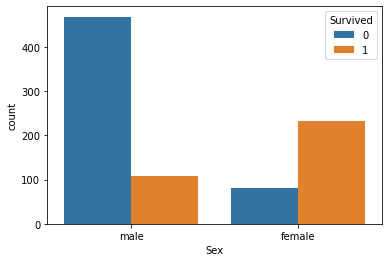

In [28]:
g = sns.countplot(x = 'Sex', hue = 'Survived', data = data)